In [1]:
%pip install geopandas


Note: you may need to restart the kernel to use updated packages.


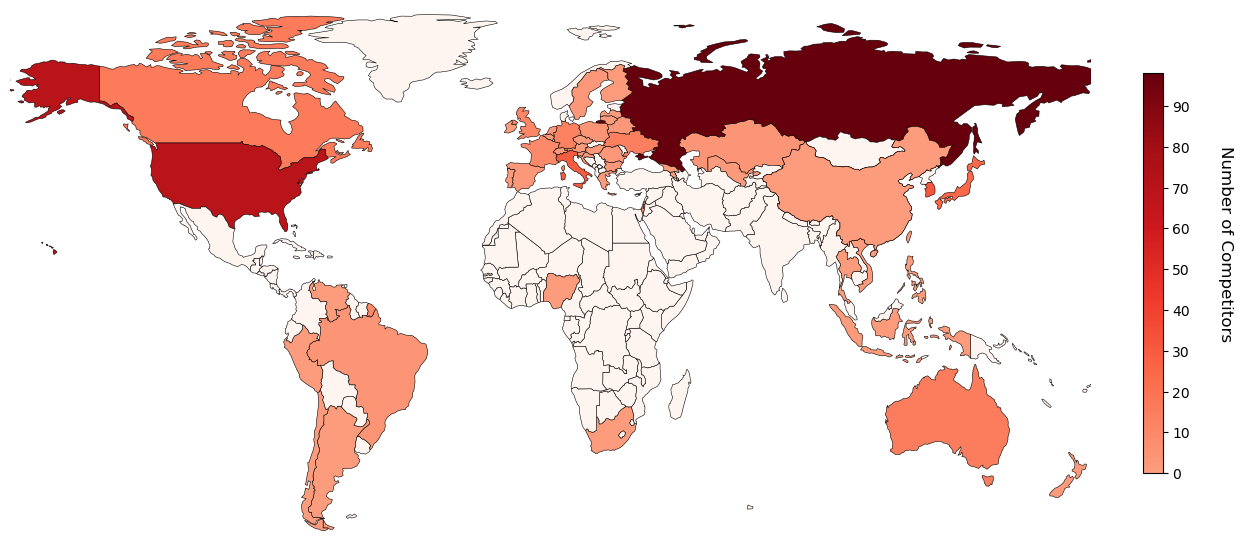

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import MaxNLocator 


# Your data
data = {
    'Country of Origin': ['Russia', 'United States of America', 'China', 'Italy', 'South Korea', 'Japan', 'Canada', 'Ukraine',
 'Australia', 'France', 'United Kingdom', 'Germany', 'Israel', 'Poland', 'Brazil', 'Kazakhstan',
 'Romania', 'Hungary', 'Bulgaria', 'Serbia', 'Sweden', 'Belgium', 'Belarus', 'Taiwan', 'Spain',
 'New Zealand', 'Greece', 'Latvia', 'Uzbekistan', 'Finland', 'Vietnam', 'Armenia', 'South Africa',
 'Ireland', 'Switzerland', 'Thailand', 'Serbia', 'Peru', 'China', 'Czechia', 'Philippines',
 'Georgia', 'Argentina', 'Nigeria', 'Venezuela', 'Lithuania', 'Portugal', 'Chile', 'Croatia',
 'Austria', 'Indonesia', 'Netherlands', 'Slovenia'],

    'count': [
        98, 70, 50, 30, 31, 25, 16, 14, 15, 10, 11, 13, 6, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1
    ]
}
df = pd.DataFrame(data)
def custom_title_case(text):
    exceptions = ['of', 'and', 'in', 'the', 'to', 'for', 'on', 'with']
    words = text.split()
    return ' '.join([word if word.lower() in exceptions else word.title() for word in words])
df['Country of Origin'] = df['Country of Origin'].apply(custom_title_case)

world = gpd.read_file("countries/ne_110m_admin_0_countries.shp")
merged = world.merge(df, how='left', left_on='ADMIN', right_on='Country of Origin')
merged['count'] = merged['count'].fillna(-50)
cmap = plt.cm.Reds
cmap.set_under('lightgray')
norm = colors.Normalize(vmin=-50, vmax=merged['count'].max(), clip=True)


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='count', ax=ax, legend=False, cmap=cmap, edgecolor='black', linewidth=0.4, norm = norm)
ax.set_xlim(-170, 180)
ax.set_ylim(-60, 85) 
ax.axis('off')
ax.set_aspect(1.2) 

cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical', fraction=0.03, pad=0.04, norm=norm, cmap=cmap)
cbar.set_ticks([0] + [x for x in range(10, int(merged['count'].max()), 10)])
cbar.set_ticklabels([0] + [x for x in range(10, int(merged['count'].max()), 10)])
cbar.ax.set_clip_on(True)
cbar.ax.set_ylim(0, merged['count'].max()) 
cbar.ax.set_position([0.88, 0.3, 0.03, 0.4])
fig.text(0.93, 0.53, 'Number of Competitors', rotation=270, va='center', ha='left', fontsize=12)

plt.show()
